In [27]:
from __future__ import division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [28]:
def logistic(y):
    out = np.exp(y)/(1+np.exp(y))
    return out

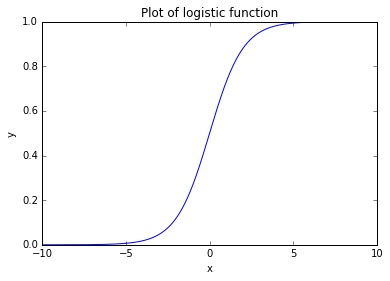

In [29]:
x = np.linspace(-10,10,num=1000)
plt.plot(x, logistic(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of logistic function')

Before continuing, let's load our dataset

In [30]:
data = np.loadtxt('admission_dataset.txt')
data_matrix = data[:,[0,1]]
admission_labels = data[:,2]

In [31]:
def logistic_insample(X, y, w):
    N, num_feat = X.shape
    E = 0
    for n in range(N):
        E = E + (1/N)*np.log(1/logistic(y)*np.dot(w, X[n,:]))
    return E

For the sake of checking our logistic log likelihood function logistic_insample, let's simulate a starting value of $w$ and evaluate

In [32]:
N, num_feat = data_matrix.shape
#Append a column of ones to the data matrix
onevec = np.ones((N,1))
X = np.concatenate((onevec, data_matrix), axis = 1)
# Let's turn the admission labels into +/- 1 labels
y = (admission_labels-0.5)*2

np.random.seed(0)
w = 0.1*np.random.randn(num_feat + 1)
L = logistic_insample(X, y, w)
print(L)

[ 1.18418489  0.18418489  0.18418489  0.18418489  1.18418489  0.18418489
  0.18418489  1.18418489  0.18418489  1.18418489  1.18418489  1.18418489
  0.18418489  1.18418489  0.18418489  1.18418489  1.18418489  1.18418489
  1.18418489  0.18418489  1.18418489  0.18418489  1.18418489  1.18418489
  0.18418489  0.18418489  0.18418489  0.18418489  0.18418489  1.18418489
  1.18418489  1.18418489  1.18418489  0.18418489  1.18418489  1.18418489
  1.18418489  1.18418489  0.18418489  0.18418489  1.18418489  0.18418489
  0.18418489  1.18418489  1.18418489  0.18418489  0.18418489  1.18418489
  1.18418489  1.18418489  1.18418489  1.18418489  1.18418489  0.18418489
  1.18418489  0.18418489  1.18418489  1.18418489  1.18418489  1.18418489
  0.18418489  1.18418489  1.18418489  0.18418489  1.18418489  1.18418489
  1.18418489  1.18418489  1.18418489  1.18418489  1.18418489  1.18418489
  1.18418489  1.18418489  1.18418489  1.18418489  1.18418489  0.18418489
  1.18418489  0.18418489  1.18418489  1.18418489  1

In [33]:
def logistic_gradient(X, y, w):
    N, _ = X.shape
    g = 0*w
    
    for n in range(N):
        g = g + 1/N * -y[n] 
    return g

SyntaxError: invalid syntax (<ipython-input-33-ef92a70b08c8>, line 6)

Again, for checking the gradient function, let's evaluate it on our simulated $w$ value

In [ ]:
G = logistic_gradient(X,y,w)
print(G)

Having working functions for logistic log likelihood and logistic gradient, let's implement gradient descent

In [ ]:
def log_reg(Xorig, y, max_iter, grad_thr):   
    
    # X is a d by N data matrix of input values
    num_pts, num_feat = Xorig.shape
    onevec = np.ones((num_pts,1))
    X = np.concatenate((onevec, Xorig), axis = 1)
    dplus1 = num_feat + 1
        
    # y is a N by 1 matrix of target values -1 and 1
    y = np.array((y-.5)*2)
        
    # Initialize learning rate for gradient descent
    learningrate = 0.1        
    
    # Initialize weights at time step 0    
    w = 0.1*np.random.randn(num_feat + 1)
    
    # Compute value of logistic log likelihood
    value = logistic_insample(X,y,w)
    
    num_iter = 0  
    convergence = 0
    
    # Keep track of function values
    E_in = []
    
    while convergence == 0:
        num_iter = num_iter + 1                        

        # Compute gradient at current w      
        g = logistic_gradient(X,y,w)
       
        # Set direction to move and take a step       
        
        ##############################################################
        
        w_new = #####Fill in!
        
        #################################################################
       
        # Check for improvement
        # Compute in-sample error for new w
        cur_value = logistic_insample(X,y,w_new)
        if cur_value < value:
            w = w_new
            value = cur_value
            E_in.append(value)
            learningrate *=1.1
        else:
            learningrate *= 0.9   
            
        # Determine whether we have converged: Is gradient norm below
        # threshold, and have we reached max_iter?
               
        g_norm = np.linalg.norm(g)
        if g_norm < grad_thr:
            convergence = 1
        elif num_iter > max_iter:
            convergence = 1
           
    return w, E_in 

In [ ]:
w, E = log_reg(data_matrix, y, 20000, 0.0000)
print(w)

Problem: Can you make the code faster?

In [ ]:
def log_pred(Xorig, w):
    # Fill in
    return P, pred_classes

Let's evaluate the classification accuracy on the training set

In [ ]:
P, pred_classes = log_pred(data_matrix, w)
errors = np.sum(np.abs(pred_classes - y)/2)
error_rate = errors/N
print(error_rate, errors)

What is going on? Let's try with a weight matrix $w = [-4.9494, 0.7547, 0.2691]$ obtained by waiting much longer

In [ ]:
P, pred_classes = log_pred(data_matrix, [-4.9494, 0.7547, 0.2691])
errors = np.sum(np.abs(pred_classes - y)/2)
error_rate = errors/N
print(error_rate, errors)

My classification accuracy is not great -- is this just not working?